In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
pip install missingno
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [192]:
df= pd.read_csv('Madrid_listings123.csv')

In [193]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,3,64,5/14/2019,0.56,1,86,4371
1,20185,CENTRAL MADRID.UP TO 10,76357,Francisco,Centro,Embajadores,40.41043,-3.70156,Entire home/apt,82,1,9,9/13/2011,0.08,8,364,4426
2,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,7/15/2018,0.57,2,0,2130
3,23148,MODERN.AMAZING.COLOURFUL.APARTMENT,76357,Francisco,Centro,Justicia,40.42174,-3.69945,Entire home/apt,76,1,17,1/19/2012,0.15,8,365,4426
4,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,85,5,2,7/3/2017,0.04,1,358,4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21434,36576704,Cute appartement with amazing location - La La...,102133711,Sami Preda'Sport,Centro,Palacio,40.41271,-3.70808,Entire home/apt,58,2,0,NaN,NaN,1,14,4426
21435,36576880,Apart. 3 personas,260881286,Fatima,Ciudad Lineal,Quintana,40.43260,-3.65436,Private room,60,1,0,NaN,NaN,2,123,2838
21436,36580017,Habitacion compartida para 2 huespedes,253689674,Esteban,Moncloa - Aravaca,Valdezarza,40.46404,-3.71936,Private room,14,1,0,NaN,NaN,7,365,3633
21437,36580707,Habitación acogedora en Ventas,193183514,Maria Carolina,Ciudad Lineal,Ventas,40.42587,-3.65749,Private room,18,1,0,NaN,NaN,1,18,2838


In [194]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'AverageSq '],
      dtype='object')

In [195]:
df.drop(['id', 'name', 'host_id', 'host_name'],axis=1,inplace=True)

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd 
import missingno as msno 

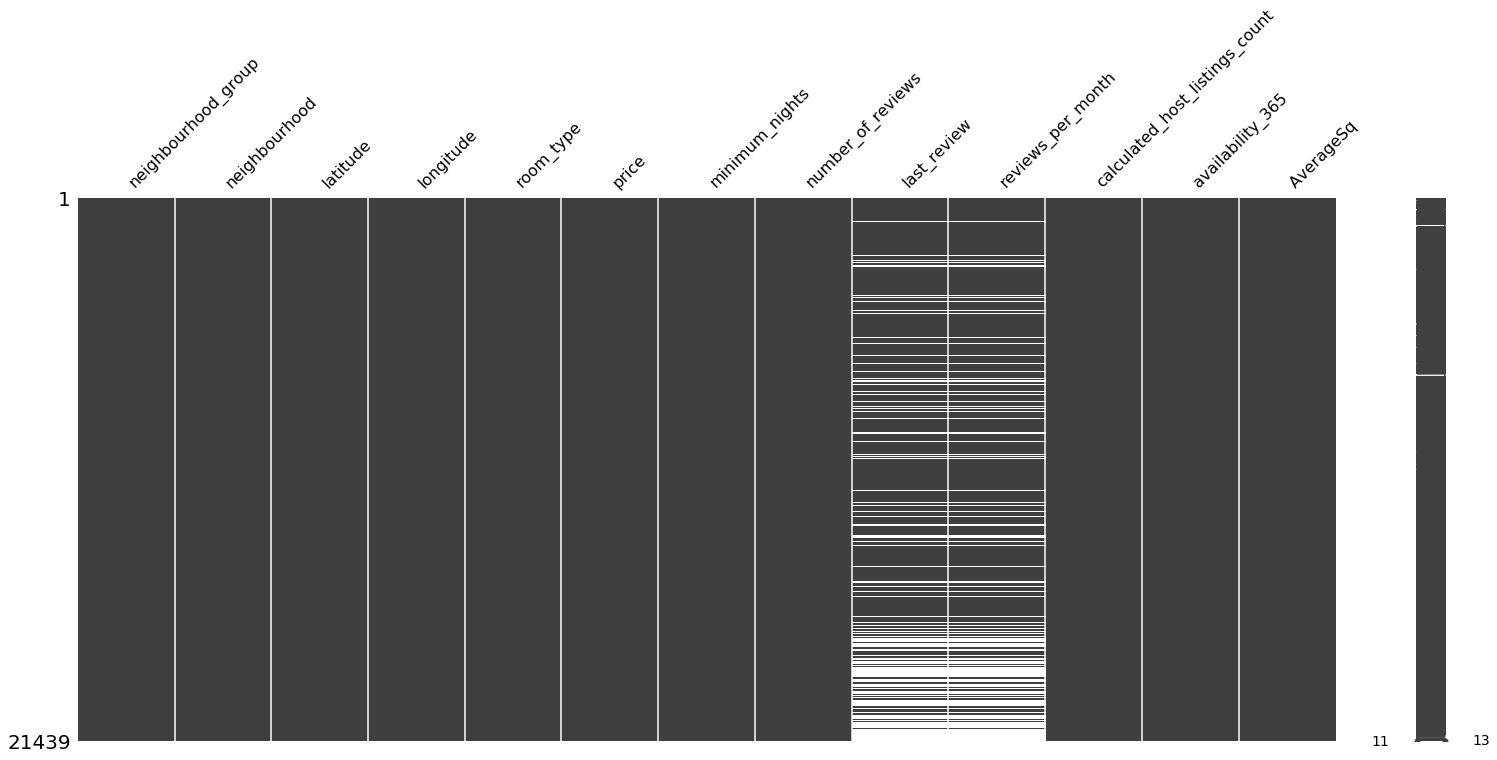

In [8]:
msno.matrix(df) 

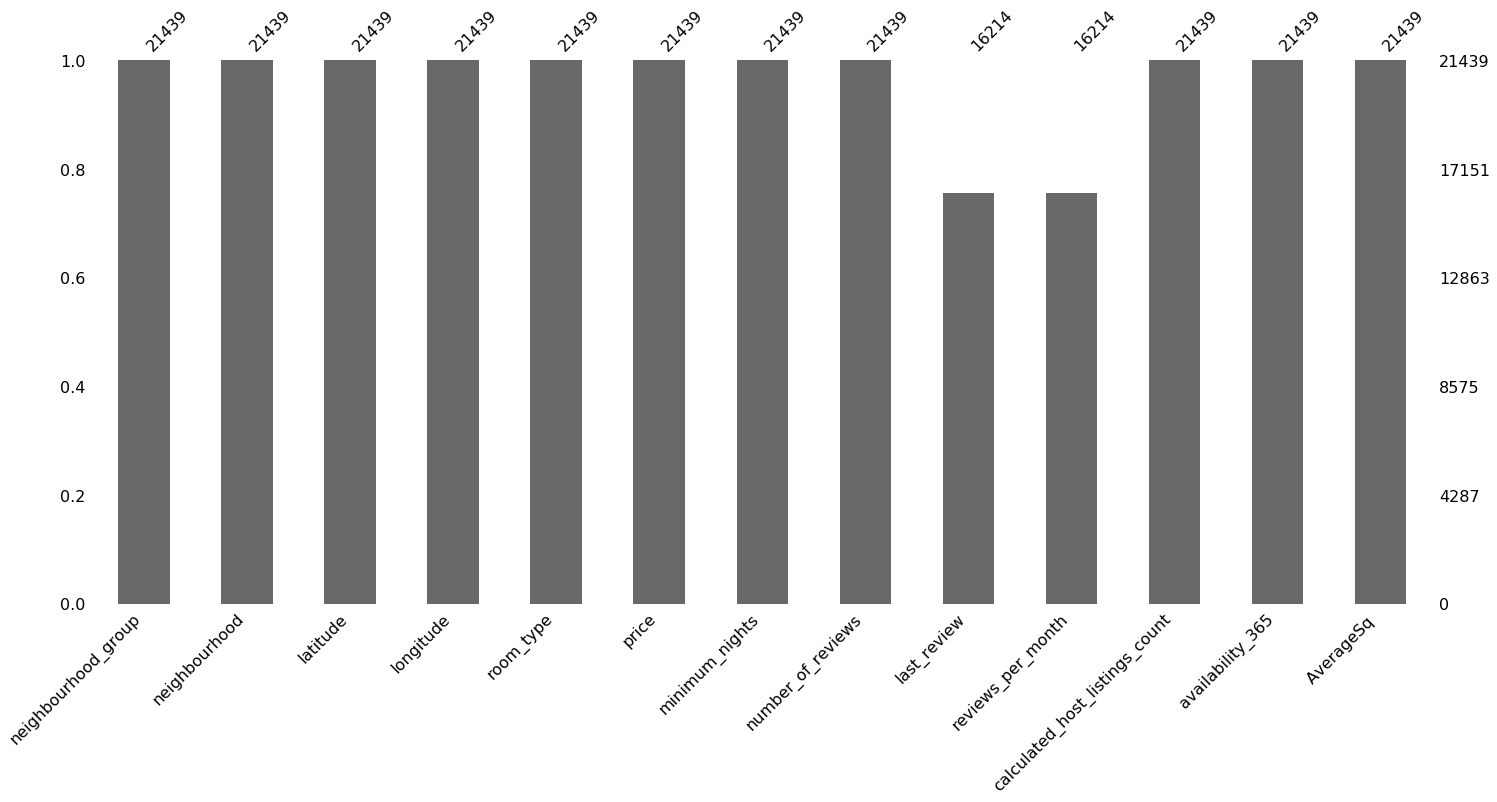

In [9]:
msno.bar(df) 

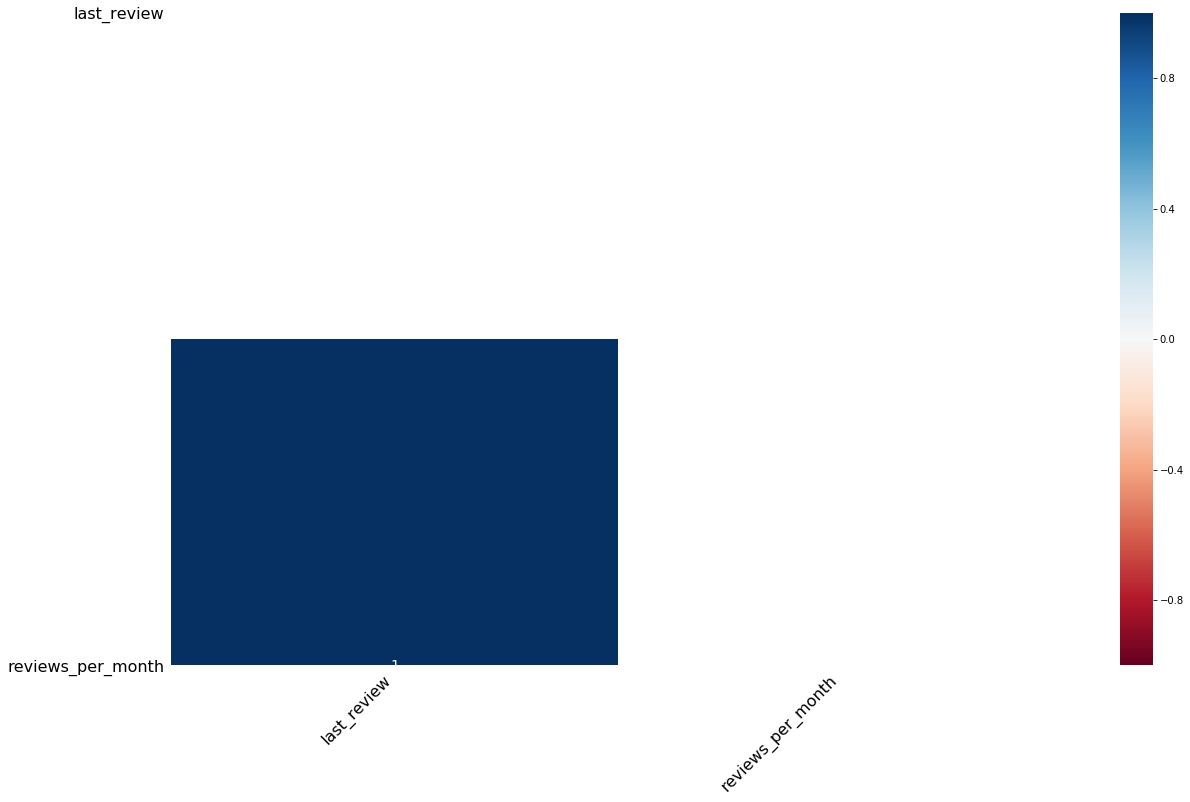

In [9]:
msno.heatmap(df)

# Clean

In [196]:
df = pd.get_dummies(df, prefix='neighbourhood_group', columns=['neighbourhood_group'])

In [197]:
df = pd.get_dummies(df, prefix='room_type', columns=['room_type'])

In [198]:
le = LabelEncoder()

df['neighbourhood'] = le.fit_transform(df['neighbourhood'])

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'AverageSq ',
       'neighbourhood_group_Barajas', 'neighbourhood_group_Carabanchel',
       'neighbourhood_group_Centro', 'neighbourhood_group_Chamartín',
       'neighbourhood_group_Chamberí', 'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbourhood_group_Vicálvaro',
       'neighbourhood_group_Villa de Vallecas',
       'neighbourhood_group_Villaverde', 'room_type_Pri

In [199]:
df.isna().sum()

neighbourhood                                   0
latitude                                        0
longitude                                       0
price                                           0
minimum_nights                                  0
number_of_reviews                               0
last_review                                  5225
reviews_per_month                            5225
calculated_host_listings_count                  0
availability_365                                0
AverageSq                                       0
neighbourhood_group_Arganzuela                  0
neighbourhood_group_Barajas                     0
neighbourhood_group_Carabanchel                 0
neighbourhood_group_Centro                      0
neighbourhood_group_Chamartín                   0
neighbourhood_group_Chamberí                    0
neighbourhood_group_Ciudad Lineal               0
neighbourhood_group_Fuencarral - El Pardo       0
neighbourhood_group_Hortaleza                   0


In [200]:
df.fillna(0,inplace=True)

In [201]:
df.isna().sum()

neighbourhood                                0
latitude                                     0
longitude                                    0
price                                        0
minimum_nights                               0
number_of_reviews                            0
last_review                                  0
reviews_per_month                            0
calculated_host_listings_count               0
availability_365                             0
AverageSq                                    0
neighbourhood_group_Arganzuela               0
neighbourhood_group_Barajas                  0
neighbourhood_group_Carabanchel              0
neighbourhood_group_Centro                   0
neighbourhood_group_Chamartín                0
neighbourhood_group_Chamberí                 0
neighbourhood_group_Ciudad Lineal            0
neighbourhood_group_Fuencarral - El Pardo    0
neighbourhood_group_Hortaleza                0
neighbourhood_group_Latina                   0
neighbourhood

In [ ]:
#Adding More INfomation to the lastreviewdate 

In [202]:
import re
def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):	
    
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)


In [203]:
add_datepart(df, 'last_review', drop=True, time=False, errors="raise")

In [204]:
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'AverageSq ',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbourhood_group_Vicálvaro',
       'neighbourhood_group_Villa de Vallecas',
     

In [205]:
df.drop(['last_reviewElapsed'],axis=1,inplace=True)

In [206]:
df.fillna(0,inplace=True)

In [207]:
df.isna().sum()

neighbourhood                                0
latitude                                     0
longitude                                    0
price                                        0
minimum_nights                               0
number_of_reviews                            0
reviews_per_month                            0
calculated_host_listings_count               0
availability_365                             0
AverageSq                                    0
neighbourhood_group_Arganzuela               0
neighbourhood_group_Barajas                  0
neighbourhood_group_Carabanchel              0
neighbourhood_group_Centro                   0
neighbourhood_group_Chamartín                0
neighbourhood_group_Chamberí                 0
neighbourhood_group_Ciudad Lineal            0
neighbourhood_group_Fuencarral - El Pardo    0
neighbourhood_group_Hortaleza                0
neighbourhood_group_Latina                   0
neighbourhood_group_Moncloa - Aravaca        0
neighbourhood

In [34]:
df.dtypes  ###added more columns

neighbourhood                                  int32
latitude                                     float64
longitude                                    float64
price                                          int64
minimum_nights                                 int64
number_of_reviews                              int64
reviews_per_month                            float64
calculated_host_listings_count                 int64
availability_365                               int64
AverageSq                                      int64
neighbourhood_group_Barajas                    uint8
neighbourhood_group_Carabanchel                uint8
neighbourhood_group_Centro                     uint8
neighbourhood_group_Chamartín                  uint8
neighbourhood_group_Chamberí                   uint8
neighbourhood_group_Ciudad Lineal              uint8
neighbourhood_group_Fuencarral - El Pardo      uint8
neighbourhood_group_Hortaleza                  uint8
neighbourhood_group_Latina                    

In [208]:
df['AverageSq '].value_counts()

4426    10122
4929     1414
4783     1338
3750     1156
3392      835
3872      703
2130      688
3633      657
1987      632
2838      630
4371      583
1726      575
2365      574
1872      363
3100      333
3190      286
2927      165
1637      160
2376      124
2205      101
Name: AverageSq , dtype: int64

In [209]:
df['logprice'] = np.log(df['price'])   ## Converting Price to log

In [210]:
df

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq,...,last_reviewDay,last_reviewDayofweek,last_reviewDayofyear,last_reviewIs_month_end,last_reviewIs_month_start,last_reviewIs_quarter_end,last_reviewIs_quarter_start,last_reviewIs_year_end,last_reviewIs_year_start,logprice
0,59,40.45628,-3.67763,70,3,64,0.56,1,86,4371,...,14,1,134,False,False,False,False,False,False,4.248495
1,49,40.41043,-3.70156,82,1,9,0.08,8,364,4426,...,13,1,256,False,False,False,False,False,False,4.406719
2,43,40.40341,-3.74084,17,4,33,0.57,2,0,2130,...,15,6,196,False,False,False,False,False,False,2.833213
3,63,40.42174,-3.69945,76,1,17,0.15,8,365,4426,...,19,3,19,False,False,False,False,False,False,4.330733
4,115,40.42202,-3.70395,85,5,2,0.04,1,358,4426,...,3,0,184,False,False,False,False,False,False,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21434,81,40.41271,-3.70808,58,2,0,0.00,1,14,4426,...,1,3,1,False,True,False,True,False,True,4.060443
21435,97,40.43260,-3.65436,60,1,0,0.00,2,123,2838,...,1,3,1,False,True,False,True,False,True,4.094345
21436,119,40.46404,-3.71936,14,1,0,0.00,7,365,3633,...,1,3,1,False,True,False,True,False,True,2.639057
21437,122,40.42587,-3.65749,18,1,0,0.00,1,18,2838,...,1,3,1,False,True,False,True,False,True,2.890372


In [211]:
df['price'].value_counts()

50      884
60      866
25      724
30      702
70      700
       ... 
747       1
760       1
875       1
1259      1
795       1
Name: price, Length: 483, dtype: int64

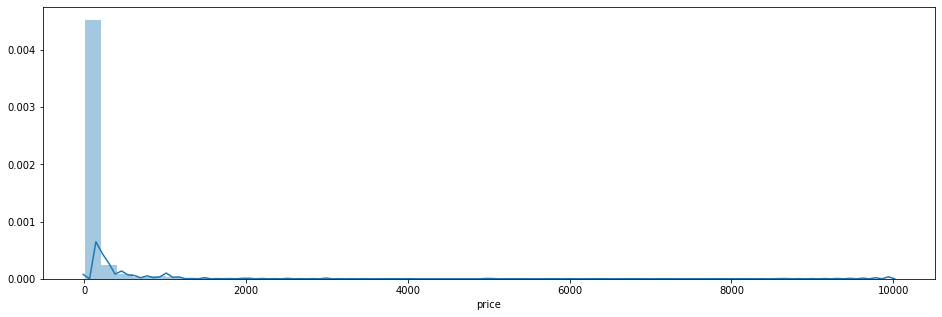

In [212]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df.price, ax=ax)

In [213]:
df.drop(['price'],axis=1,inplace=True)

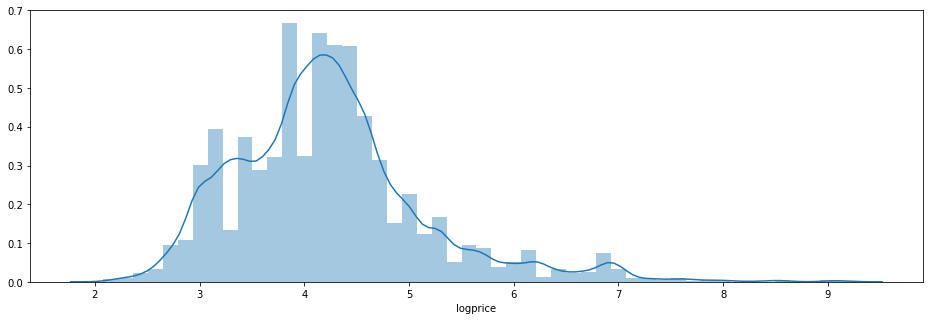

In [214]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df.logprice, ax=ax)

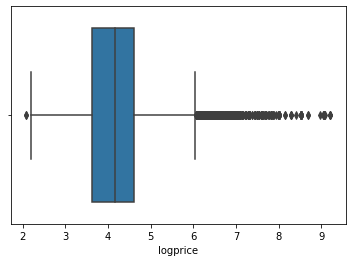

In [215]:
import seaborn as sns
sns.boxplot(x=df['logprice'])

In [216]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [217]:
cleandf=remove_outlier(df,'logprice') # removing price above 90 th percentile

In [218]:
cleandf

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq,neighbourhood_group_Arganzuela,...,last_reviewDay,last_reviewDayofweek,last_reviewDayofyear,last_reviewIs_month_end,last_reviewIs_month_start,last_reviewIs_quarter_end,last_reviewIs_quarter_start,last_reviewIs_year_end,last_reviewIs_year_start,logprice
0,59,40.45628,-3.67763,3,64,0.56,1,86,4371,0,...,14,1,134,False,False,False,False,False,False,4.248495
1,49,40.41043,-3.70156,1,9,0.08,8,364,4426,0,...,13,1,256,False,False,False,False,False,False,4.406719
2,43,40.40341,-3.74084,4,33,0.57,2,0,2130,0,...,15,6,196,False,False,False,False,False,False,2.833213
3,63,40.42174,-3.69945,1,17,0.15,8,365,4426,0,...,19,3,19,False,False,False,False,False,False,4.330733
4,115,40.42202,-3.70395,5,2,0.04,1,358,4426,0,...,3,0,184,False,False,False,False,False,False,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21434,81,40.41271,-3.70808,2,0,0.00,1,14,4426,0,...,1,3,1,False,True,False,True,False,True,4.060443
21435,97,40.43260,-3.65436,1,0,0.00,2,123,2838,0,...,1,3,1,False,True,False,True,False,True,4.094345
21436,119,40.46404,-3.71936,1,0,0.00,7,365,3633,0,...,1,3,1,False,True,False,True,False,True,2.639057
21437,122,40.42587,-3.65749,1,0,0.00,1,18,2838,0,...,1,3,1,False,True,False,True,False,True,2.890372


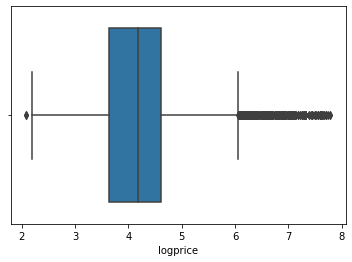

In [219]:
import seaborn as sns
sns.boxplot(x=cleandf['logprice'])

In [220]:
def remove_outlier2(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

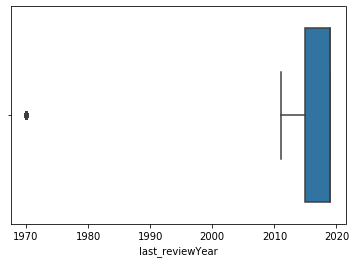

In [221]:
import seaborn as sns
sns.boxplot(x=cleandf['last_reviewYear'])

# Removing 1970 / null value from last_reviewYear


In [222]:
cleandf=remove_outlier2(cleandf,'last_reviewYear')

In [223]:
df

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq,neighbourhood_group_Arganzuela,...,last_reviewDay,last_reviewDayofweek,last_reviewDayofyear,last_reviewIs_month_end,last_reviewIs_month_start,last_reviewIs_quarter_end,last_reviewIs_quarter_start,last_reviewIs_year_end,last_reviewIs_year_start,logprice
0,59,40.45628,-3.67763,3,64,0.56,1,86,4371,0,...,14,1,134,False,False,False,False,False,False,4.248495
1,49,40.41043,-3.70156,1,9,0.08,8,364,4426,0,...,13,1,256,False,False,False,False,False,False,4.406719
2,43,40.40341,-3.74084,4,33,0.57,2,0,2130,0,...,15,6,196,False,False,False,False,False,False,2.833213
3,63,40.42174,-3.69945,1,17,0.15,8,365,4426,0,...,19,3,19,False,False,False,False,False,False,4.330733
4,115,40.42202,-3.70395,5,2,0.04,1,358,4426,0,...,3,0,184,False,False,False,False,False,False,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21434,81,40.41271,-3.70808,2,0,0.00,1,14,4426,0,...,1,3,1,False,True,False,True,False,True,4.060443
21435,97,40.43260,-3.65436,1,0,0.00,2,123,2838,0,...,1,3,1,False,True,False,True,False,True,4.094345
21436,119,40.46404,-3.71936,1,0,0.00,7,365,3633,0,...,1,3,1,False,True,False,True,False,True,2.639057
21437,122,40.42587,-3.65749,1,0,0.00,1,18,2838,0,...,1,3,1,False,True,False,True,False,True,2.890372


In [224]:
cleandf['last_reviewYear'].value_counts()

2019    13162
2018     1842
2017      732
2016      284
2015      123
2014       25
2013       14
2012        7
2011        2
Name: last_reviewYear, dtype: int64

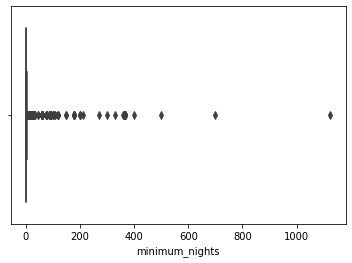

In [225]:
import seaborn as sns
sns.boxplot(x=cleandf['minimum_nights'])

# Removing Outliers

In [226]:
def remove_outlier3(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.99)                             
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [227]:
cleandf2=remove_outlier3(cleandf,'minimum_nights') # removing above 99 percentile

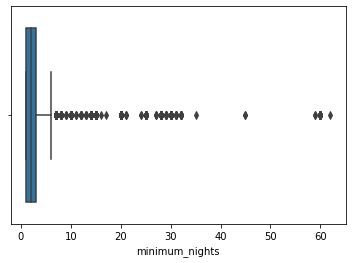

In [228]:
sns.boxplot(x=cleandf2['minimum_nights'])

In [229]:
df['minimum_nights'].value_counts()

1       8313
2       6763
3       3334
4        695
5        556
7        505
30       301
15       169
6        142
10       105
14        86
28        64
20        63
90        48
60        39
8         30
25        23
12        19
32        19
180       17
31        17
365       16
29        11
100       10
13         7
120        7
21         6
27         5
24         4
200        4
9          4
300        4
11         4
45         4
270        4
150        3
18         3
364        2
35         2
62         2
50         2
26         2
16         2
210        2
17         2
22         2
80         2
59         2
110        2
366        1
398        1
360        1
61         1
500        1
1124       1
76         1
75         1
39         1
330        1
700        1
Name: minimum_nights, dtype: int64

# Validation

In [230]:
splitter = train_test_split
"-----------------------"

df_model, df_val = splitter(cleandf2, test_size = 0.3, random_state = 42)
print("Dataset shape: {shape}".format(shape = df_model.shape))
print("Dataset shape: {shape}".format(shape = df_val.shape))

Dataset shape: (11278, 46)
Dataset shape: (4834, 46)


In [231]:
target = 'logprice'
#variables = features
X_train= df_model.drop('logprice',axis=1)
y_train = df_model[target]

X_test= df_val.drop('logprice',axis=1)
y_test = df_val[target]

In [232]:
X_train

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq,neighbourhood_group_Arganzuela,...,last_reviewWeek,last_reviewDay,last_reviewDayofweek,last_reviewDayofyear,last_reviewIs_month_end,last_reviewIs_month_start,last_reviewIs_quarter_end,last_reviewIs_quarter_start,last_reviewIs_year_end,last_reviewIs_year_start
281,83,40.39224,-3.66378,2,3,0.04,1,0,1726,0,...,17,21,0,111,False,False,False,False,False,False
12443,49,40.41171,-3.70599,2,5,0.45,1,218,4426,0,...,18,30,1,120,True,False,False,False,False,False
7734,49,40.40590,-3.70193,1,148,6.02,31,33,4426,0,...,27,5,4,186,False,False,False,False,False,False
19393,19,40.46000,-3.69904,1,4,3.08,1,327,3392,0,...,25,23,6,174,False,False,False,False,False,False
5607,49,40.40976,-3.69604,3,74,2.37,2,19,4426,0,...,20,18,5,138,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15416,117,40.48868,-3.66227,1,7,1.96,30,245,3100,0,...,26,24,0,175,False,False,False,False,False,False
6046,49,40.41094,-3.69863,2,130,4.44,4,75,4426,0,...,27,3,2,184,False,False,False,False,False,False
915,100,40.44081,-3.69417,5,85,1.38,1,299,4783,0,...,42,21,6,294,False,False,False,False,False,False
19877,16,40.43300,-3.72339,1,1,1.00,2,56,3633,0,...,27,7,6,188,False,False,False,False,False,False


In [233]:
y_train

281      3.806662
12443    4.553877
7734     4.382027
19393    4.442651
5607     4.094345
           ...   
15416    5.424950
6046     3.663562
915      4.174387
19877    3.663562
8251     4.584967
Name: logprice, Length: 11278, dtype: float64

In [234]:
X_test

,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,AverageSq,neighbourhood_group_Arganzuela,...,last_reviewWeek,last_reviewDay,last_reviewDayofweek,last_reviewDayofyear,last_reviewIs_month_end,last_reviewIs_month_start,last_reviewIs_quarter_end,last_reviewIs_quarter_start,last_reviewIs_year_end,last_reviewIs_year_start
14751,112,40.41670,-3.70535,1,9,1.34,22,89,4426,0,...,27,3,2,184,False,False,False,False,False,False
12631,116,40.46967,-3.70212,2,1,0.12,1,325,3392,0,...,44,4,6,308,False,False,False,False,False,False
1075,36,40.39278,-3.71301,2,96,1.65,1,171,1987,0,...,28,8,0,189,False,False,False,False,False,False
4296,63,40.42404,-3.69940,6,23,0.63,2,135,4426,0,...,43,28,6,301,False,False,False,False,False,False
7184,49,40.40836,-3.69827,2,6,0.30,3,86,4426,0,...,26,24,0,175,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,115,40.42433,-3.70763,5,39,0.80,1,68,4426,0,...,17,27,5,117,False,False,False,False,False,False
7467,124,40.38689,-3.73747,1,16,0.65,2,0,1987,0,...,15,15,6,105,False,False,False,False,False,False
17422,89,40.47144,-3.63818,1,4,2.45,2,43,3100,0,...,27,7,6,188,False,False,False,False,False,False
6495,81,40.41352,-3.70833,2,132,4.89,4,29,4426,0,...,27,5,4,186,False,False,False,False,False,False


In [235]:
y_test

14751    5.991465
12631    3.688879
1075     3.806662
4296     4.077537
7184     3.951244
           ...   
2304     4.499810
7467     4.094345
17422    4.094345
6495     4.248495
2619     4.605170
Name: logprice, Length: 4834, dtype: float64

# Model & Feature Selection

In [236]:
X_train.columns

Index(['neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'AverageSq ',
       'neighbourhood_group_Arganzuela', 'neighbourhood_group_Barajas',
       'neighbourhood_group_Carabanchel', 'neighbourhood_group_Centro',
       'neighbourhood_group_Chamartín', 'neighbourhood_group_Chamberí',
       'neighbourhood_group_Ciudad Lineal',
       'neighbourhood_group_Fuencarral - El Pardo',
       'neighbourhood_group_Hortaleza', 'neighbourhood_group_Latina',
       'neighbourhood_group_Moncloa - Aravaca',
       'neighbourhood_group_Moratalaz',
       'neighbourhood_group_Puente de Vallecas', 'neighbourhood_group_Retiro',
       'neighbourhood_group_Salamanca',
       'neighbourhood_group_San Blas - Canillejas',
       'neighbourhood_group_Tetuán', 'neighbourhood_group_Usera',
       'neighbourhood_group_Vicálvaro',
       'neighbourhood_group_Villa de Vallecas',
       'neighb

In [237]:
def rf(xs, y, n_estimators=40, 
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
         max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [238]:
from sklearn.ensemble import RandomForestRegressor
m = rf(X_train, y_train);

In [239]:
import math
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [240]:
m_rmse(m,X_train, y_train), m_rmse(m,X_test, y_test)

(0.353976, 0.478019)

In [241]:
pred=m.predict(X_test)

In [242]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5484303193915034

In [243]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.43650755823728316

In [244]:
p=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, p)

0.44783082995139734

In [245]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [85]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [86]:
best_random = rf_random.best_estimator_

In [87]:
pprint(best_random.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [88]:
bestm=best_random.fit(X_train, y_train)

In [89]:
m_rmse(bestm,X_train, y_train), m_rmse(bestm,X_test, y_test)

(0.3105, 0.475138)

In [90]:
pred2=bestm.predict(X_test)


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, pred2)

0.5515813168170363

In [140]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.43632963654577117

In [246]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = model.randomized_search(grid,
                                                   X=X_train,
                                                   y=y_train,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.4736462	best: 0.4736462 (0)	total: 6.89s	remaining: 1m 2s
1:	loss: 0.4714324	best: 0.4714324 (1)	total: 13.3s	remaining: 53.3s
2:	loss: 0.4714390	best: 0.4714324 (1)	total: 19.7s	remaining: 45.9s
3:	loss: 0.4705088	best: 0.4705088 (3)	total: 26.1s	remaining: 39.2s
4:	loss: 0.4698448	best: 0.4698448 (4)	total: 36.9s	remaining: 36.9s
5:	loss: 0.4704812	best: 0.4698448 (4)	total: 47.9s	remaining: 32s
6:	loss: 0.4703959	best: 0.4698448 (4)	total: 59.1s	remaining: 25.3s
7:	loss: 0.4684291	best: 0.4684291 (7)	total: 1m 11s	remaining: 17.8s
8:	loss: 0.4802316	best: 0.4684291 (7)	total: 2m	remaining: 13.4s
9:	loss: 0.4739032	best: 0.4684291 (7)	total: 2m 51s	remaining: 0us
Estimating final quality...


In [247]:
from catboost import CatBoostRegressor

In [255]:
model2 = CatBoostRegressor(learning_rate=0.1,depth=8,l2_leaf_reg=9)

In [256]:
m4=model2.fit(X_train,y_train)

0:	learn: 0.6920730	total: 10ms	remaining: 10s
1:	learn: 0.6672392	total: 23.2ms	remaining: 11.6s
2:	learn: 0.6463823	total: 41.2ms	remaining: 13.7s
3:	learn: 0.6285742	total: 52.2ms	remaining: 13s
4:	learn: 0.6135169	total: 61.6ms	remaining: 12.3s
5:	learn: 0.5996049	total: 81.3ms	remaining: 13.5s
6:	learn: 0.5874502	total: 93.2ms	remaining: 13.2s
7:	learn: 0.5777816	total: 108ms	remaining: 13.4s
8:	learn: 0.5686622	total: 125ms	remaining: 13.8s
9:	learn: 0.5617464	total: 137ms	remaining: 13.5s
10:	learn: 0.5551645	total: 154ms	remaining: 13.8s
11:	learn: 0.5502115	total: 167ms	remaining: 13.8s
12:	learn: 0.5449260	total: 179ms	remaining: 13.6s
13:	learn: 0.5403535	total: 191ms	remaining: 13.5s
14:	learn: 0.5368082	total: 203ms	remaining: 13.4s
15:	learn: 0.5329866	total: 218ms	remaining: 13.4s
16:	learn: 0.5294809	total: 235ms	remaining: 13.6s
17:	learn: 0.5273357	total: 253ms	remaining: 13.8s
18:	learn: 0.5247218	total: 268ms	remaining: 13.8s
19:	learn: 0.5216046	total: 281ms	remain

161:	learn: 0.4331259	total: 2.57s	remaining: 13.3s
162:	learn: 0.4327240	total: 2.58s	remaining: 13.3s
163:	learn: 0.4322342	total: 2.6s	remaining: 13.2s
164:	learn: 0.4319438	total: 2.62s	remaining: 13.2s
165:	learn: 0.4314179	total: 2.63s	remaining: 13.2s
166:	learn: 0.4309580	total: 2.64s	remaining: 13.2s
167:	learn: 0.4306232	total: 2.66s	remaining: 13.2s
168:	learn: 0.4302359	total: 2.7s	remaining: 13.3s
169:	learn: 0.4300536	total: 2.72s	remaining: 13.3s
170:	learn: 0.4293597	total: 2.75s	remaining: 13.3s
171:	learn: 0.4291603	total: 2.76s	remaining: 13.3s
172:	learn: 0.4286906	total: 2.79s	remaining: 13.3s
173:	learn: 0.4281262	total: 2.8s	remaining: 13.3s
174:	learn: 0.4276725	total: 2.82s	remaining: 13.3s
175:	learn: 0.4275194	total: 2.84s	remaining: 13.3s
176:	learn: 0.4271656	total: 2.86s	remaining: 13.3s
177:	learn: 0.4267799	total: 2.87s	remaining: 13.3s
178:	learn: 0.4265136	total: 2.88s	remaining: 13.2s
179:	learn: 0.4260080	total: 2.91s	remaining: 13.3s
180:	learn: 0.4

320:	learn: 0.3881394	total: 5.27s	remaining: 11.2s
321:	learn: 0.3878585	total: 5.29s	remaining: 11.1s
322:	learn: 0.3875304	total: 5.3s	remaining: 11.1s
323:	learn: 0.3869707	total: 5.32s	remaining: 11.1s
324:	learn: 0.3868232	total: 5.33s	remaining: 11.1s
325:	learn: 0.3863150	total: 5.35s	remaining: 11.1s
326:	learn: 0.3860940	total: 5.37s	remaining: 11s
327:	learn: 0.3858138	total: 5.38s	remaining: 11s
328:	learn: 0.3855067	total: 5.4s	remaining: 11s
329:	learn: 0.3853663	total: 5.41s	remaining: 11s
330:	learn: 0.3851239	total: 5.43s	remaining: 11s
331:	learn: 0.3848648	total: 5.44s	remaining: 11s
332:	learn: 0.3846552	total: 5.46s	remaining: 10.9s
333:	learn: 0.3843934	total: 5.48s	remaining: 10.9s
334:	learn: 0.3841147	total: 5.49s	remaining: 10.9s
335:	learn: 0.3838415	total: 5.51s	remaining: 10.9s
336:	learn: 0.3836461	total: 5.52s	remaining: 10.9s
337:	learn: 0.3834293	total: 5.54s	remaining: 10.8s
338:	learn: 0.3832120	total: 5.55s	remaining: 10.8s
339:	learn: 0.3829862	tota

479:	learn: 0.3533222	total: 7.77s	remaining: 8.41s
480:	learn: 0.3530584	total: 7.78s	remaining: 8.4s
481:	learn: 0.3529277	total: 7.8s	remaining: 8.38s
482:	learn: 0.3528106	total: 7.81s	remaining: 8.36s
483:	learn: 0.3524347	total: 7.83s	remaining: 8.35s
484:	learn: 0.3520513	total: 7.84s	remaining: 8.33s
485:	learn: 0.3518412	total: 7.86s	remaining: 8.31s
486:	learn: 0.3515914	total: 7.87s	remaining: 8.29s
487:	learn: 0.3513569	total: 7.88s	remaining: 8.27s
488:	learn: 0.3511676	total: 7.89s	remaining: 8.25s
489:	learn: 0.3511002	total: 7.91s	remaining: 8.23s
490:	learn: 0.3509634	total: 7.92s	remaining: 8.21s
491:	learn: 0.3506277	total: 7.93s	remaining: 8.19s
492:	learn: 0.3505476	total: 7.95s	remaining: 8.17s
493:	learn: 0.3503772	total: 7.96s	remaining: 8.15s
494:	learn: 0.3502984	total: 7.97s	remaining: 8.14s
495:	learn: 0.3501745	total: 7.99s	remaining: 8.12s
496:	learn: 0.3498997	total: 8.01s	remaining: 8.1s
497:	learn: 0.3496738	total: 8.02s	remaining: 8.08s
498:	learn: 0.3

638:	learn: 0.3276040	total: 10.2s	remaining: 5.78s
639:	learn: 0.3274711	total: 10.2s	remaining: 5.76s
640:	learn: 0.3272834	total: 10.3s	remaining: 5.75s
641:	learn: 0.3272640	total: 10.3s	remaining: 5.73s
642:	learn: 0.3272457	total: 10.3s	remaining: 5.71s
643:	learn: 0.3271493	total: 10.3s	remaining: 5.7s
644:	learn: 0.3269757	total: 10.3s	remaining: 5.68s
645:	learn: 0.3268378	total: 10.3s	remaining: 5.66s
646:	learn: 0.3267149	total: 10.3s	remaining: 5.65s
647:	learn: 0.3266215	total: 10.4s	remaining: 5.63s
648:	learn: 0.3263842	total: 10.4s	remaining: 5.62s
649:	learn: 0.3263470	total: 10.4s	remaining: 5.6s
650:	learn: 0.3262495	total: 10.4s	remaining: 5.58s
651:	learn: 0.3260112	total: 10.4s	remaining: 5.57s
652:	learn: 0.3256950	total: 10.4s	remaining: 5.55s
653:	learn: 0.3256611	total: 10.5s	remaining: 5.54s
654:	learn: 0.3254371	total: 10.5s	remaining: 5.52s
655:	learn: 0.3252242	total: 10.5s	remaining: 5.5s
656:	learn: 0.3249757	total: 10.5s	remaining: 5.49s
657:	learn: 0.3

797:	learn: 0.3051634	total: 12.7s	remaining: 3.22s
798:	learn: 0.3050903	total: 12.7s	remaining: 3.2s
799:	learn: 0.3048992	total: 12.8s	remaining: 3.19s
800:	learn: 0.3048213	total: 12.8s	remaining: 3.17s
801:	learn: 0.3046957	total: 12.8s	remaining: 3.15s
802:	learn: 0.3044933	total: 12.8s	remaining: 3.14s
803:	learn: 0.3044108	total: 12.8s	remaining: 3.12s
804:	learn: 0.3042746	total: 12.8s	remaining: 3.11s
805:	learn: 0.3042024	total: 12.8s	remaining: 3.09s
806:	learn: 0.3041536	total: 12.9s	remaining: 3.07s
807:	learn: 0.3041391	total: 12.9s	remaining: 3.06s
808:	learn: 0.3041140	total: 12.9s	remaining: 3.04s
809:	learn: 0.3040463	total: 12.9s	remaining: 3.02s
810:	learn: 0.3038508	total: 12.9s	remaining: 3.01s
811:	learn: 0.3037171	total: 12.9s	remaining: 2.99s
812:	learn: 0.3036246	total: 12.9s	remaining: 2.98s
813:	learn: 0.3035595	total: 13s	remaining: 2.96s
814:	learn: 0.3034235	total: 13s	remaining: 2.95s
815:	learn: 0.3031878	total: 13s	remaining: 2.93s
816:	learn: 0.30299

956:	learn: 0.2847452	total: 15.3s	remaining: 685ms
957:	learn: 0.2846482	total: 15.3s	remaining: 669ms
958:	learn: 0.2845148	total: 15.3s	remaining: 653ms
959:	learn: 0.2843732	total: 15.3s	remaining: 638ms
960:	learn: 0.2843456	total: 15.3s	remaining: 622ms
961:	learn: 0.2842356	total: 15.3s	remaining: 606ms
962:	learn: 0.2841830	total: 15.3s	remaining: 590ms
963:	learn: 0.2840498	total: 15.4s	remaining: 574ms
964:	learn: 0.2839042	total: 15.4s	remaining: 558ms
965:	learn: 0.2838304	total: 15.4s	remaining: 542ms
966:	learn: 0.2835800	total: 15.4s	remaining: 526ms
967:	learn: 0.2834013	total: 15.4s	remaining: 510ms
968:	learn: 0.2833002	total: 15.4s	remaining: 494ms
969:	learn: 0.2832096	total: 15.5s	remaining: 478ms
970:	learn: 0.2830313	total: 15.5s	remaining: 462ms
971:	learn: 0.2829793	total: 15.5s	remaining: 446ms
972:	learn: 0.2829014	total: 15.5s	remaining: 430ms
973:	learn: 0.2828042	total: 15.5s	remaining: 414ms
974:	learn: 0.2826964	total: 15.5s	remaining: 398ms
975:	learn: 

In [257]:
pred2=model2.predict(X_test, 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)

In [258]:
from sklearn.metrics import r2_score
r2_score(y_test, pred2)

0.568540693437392

In [259]:
def rf_catfeat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.get_feature_importance()}
                       ).sort_values('imp', ascending=False)

In [260]:
fi = rf_catfeat_importance(model2, X_train)
fi[:10]

,cols,imp
30,room_type_Entire home/apt,29.490574
4,number_of_reviews,8.019722
7,availability_365,7.858682
6,calculated_host_listings_count,7.854070
1,latitude,7.782550
2,longitude,6.495214
5,reviews_per_month,5.900162
36,last_reviewDay,4.283771
3,minimum_nights,3.863278
0,neighbourhood,3.563452


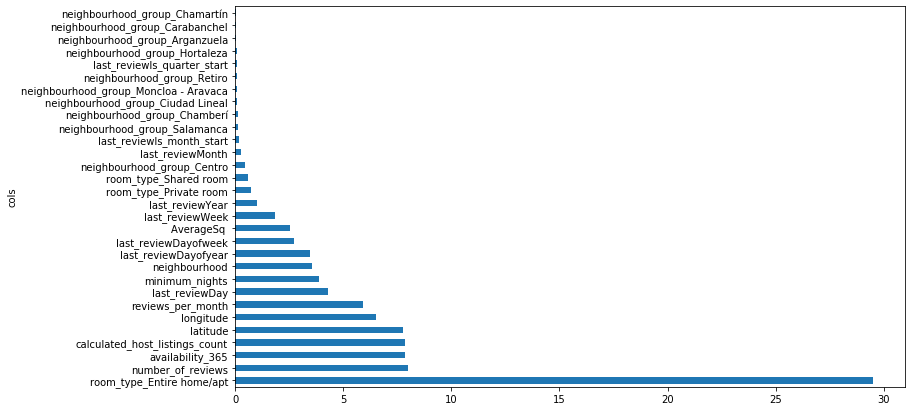

In [261]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [262]:
to_keep = fi[fi.imp>2.5].cols
len(to_keep)

13

In [263]:
list(to_keep)

['room_type_Entire home/apt',
 'number_of_reviews',
 'availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'reviews_per_month',
 'last_reviewDay',
 'minimum_nights',
 'neighbourhood',
 'last_reviewDayofyear',
 'last_reviewDayofweek',
 'AverageSq ']

In [264]:
xs_imp = X_train[to_keep]
valid_xs_imp = X_test[to_keep]

In [162]:
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [163]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [164]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(xs_imp, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [165]:
best_random = rf_random.best_estimator_

In [166]:
pprint(best_random.get_params())

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 60,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [167]:
bestm=best_random.fit(xs_imp, y_train)

In [169]:
m_rmse(bestm,xs_imp, y_train), m_rmse(bestm,valid_xs_imp, y_test)

(0.204211, 0.469638)

In [170]:
pred2=bestm.predict(valid_xs_imp)

In [171]:
from sklearn.metrics import r2_score
r2_score(y_test, pred2)

0.5641269668879333

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
plot_fi(rf_feat_importance(bestm, xs_imp));

In [265]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = model.randomized_search(grid,
                                                   X=xs_imp,
                                                   y=y_train,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.4753152	best: 0.4753152 (0)	total: 3.09s	remaining: 27.9s
1:	loss: 0.4719026	best: 0.4719026 (1)	total: 5.77s	remaining: 23.1s
2:	loss: 0.4729145	best: 0.4719026 (1)	total: 8.36s	remaining: 19.5s
3:	loss: 0.4727147	best: 0.4719026 (1)	total: 10.5s	remaining: 15.8s
4:	loss: 0.4689695	best: 0.4689695 (4)	total: 13.9s	remaining: 13.9s
5:	loss: 0.4724393	best: 0.4689695 (4)	total: 17.3s	remaining: 11.5s
6:	loss: 0.4738176	best: 0.4689695 (4)	total: 20.5s	remaining: 8.77s
7:	loss: 0.4705591	best: 0.4689695 (4)	total: 23.3s	remaining: 5.82s
8:	loss: 0.4831260	best: 0.4689695 (4)	total: 42.1s	remaining: 4.68s
9:	loss: 0.4794208	best: 0.4689695 (4)	total: 1m	remaining: 0us
Estimating final quality...


In [270]:
from catboost import CatBoostRegressor
model3 = CatBoostRegressor(learning_rate=0.1,depth=6,l2_leaf_reg=5)
m4=model3.fit(xs_imp,y_train)
pred3=m4.predict(X_test, 
        ntree_start=0, 
        ntree_end=0, 
        thread_count=-1,
        verbose=None)


0:	learn: 0.6911681	total: 5.09ms	remaining: 5.09s
1:	learn: 0.6677282	total: 9.21ms	remaining: 4.6s
2:	learn: 0.6460833	total: 13ms	remaining: 4.32s
3:	learn: 0.6286033	total: 17.3ms	remaining: 4.32s
4:	learn: 0.6125054	total: 21.4ms	remaining: 4.26s
5:	learn: 0.5990556	total: 26.3ms	remaining: 4.36s
6:	learn: 0.5881353	total: 35.2ms	remaining: 4.99s
7:	learn: 0.5782690	total: 39.1ms	remaining: 4.85s
8:	learn: 0.5695351	total: 43.1ms	remaining: 4.75s
9:	learn: 0.5618776	total: 47.4ms	remaining: 4.7s
10:	learn: 0.5561022	total: 51.3ms	remaining: 4.61s
11:	learn: 0.5500664	total: 55.1ms	remaining: 4.53s
12:	learn: 0.5449675	total: 58.9ms	remaining: 4.47s
13:	learn: 0.5411402	total: 63ms	remaining: 4.43s
14:	learn: 0.5379909	total: 68.1ms	remaining: 4.47s
15:	learn: 0.5348811	total: 72.3ms	remaining: 4.44s
16:	learn: 0.5327343	total: 76.4ms	remaining: 4.42s
17:	learn: 0.5302804	total: 80ms	remaining: 4.36s
18:	learn: 0.5281273	total: 83.9ms	remaining: 4.33s
19:	learn: 0.5265734	total: 87

160:	learn: 0.4533354	total: 682ms	remaining: 3.55s
161:	learn: 0.4529740	total: 685ms	remaining: 3.54s
162:	learn: 0.4525709	total: 689ms	remaining: 3.54s
163:	learn: 0.4522444	total: 693ms	remaining: 3.53s
164:	learn: 0.4518023	total: 699ms	remaining: 3.54s
165:	learn: 0.4514213	total: 703ms	remaining: 3.53s
166:	learn: 0.4511275	total: 707ms	remaining: 3.53s
167:	learn: 0.4507961	total: 711ms	remaining: 3.52s
168:	learn: 0.4505067	total: 715ms	remaining: 3.51s
169:	learn: 0.4502051	total: 719ms	remaining: 3.51s
170:	learn: 0.4499284	total: 722ms	remaining: 3.5s
171:	learn: 0.4496361	total: 727ms	remaining: 3.5s
172:	learn: 0.4493786	total: 730ms	remaining: 3.49s
173:	learn: 0.4490539	total: 735ms	remaining: 3.49s
174:	learn: 0.4487438	total: 739ms	remaining: 3.48s
175:	learn: 0.4485258	total: 744ms	remaining: 3.48s
176:	learn: 0.4483583	total: 750ms	remaining: 3.48s
177:	learn: 0.4480831	total: 754ms	remaining: 3.48s
178:	learn: 0.4478475	total: 758ms	remaining: 3.48s
179:	learn: 0.

319:	learn: 0.4171234	total: 1.39s	remaining: 2.96s
320:	learn: 0.4168249	total: 1.39s	remaining: 2.95s
321:	learn: 0.4166784	total: 1.4s	remaining: 2.95s
322:	learn: 0.4165422	total: 1.4s	remaining: 2.94s
323:	learn: 0.4163441	total: 1.41s	remaining: 2.94s
324:	learn: 0.4160323	total: 1.41s	remaining: 2.93s
325:	learn: 0.4158728	total: 1.42s	remaining: 2.93s
326:	learn: 0.4157789	total: 1.42s	remaining: 2.92s
327:	learn: 0.4155956	total: 1.42s	remaining: 2.91s
328:	learn: 0.4154373	total: 1.43s	remaining: 2.91s
329:	learn: 0.4152796	total: 1.43s	remaining: 2.9s
330:	learn: 0.4152269	total: 1.43s	remaining: 2.9s
331:	learn: 0.4150257	total: 1.44s	remaining: 2.89s
332:	learn: 0.4149294	total: 1.44s	remaining: 2.89s
333:	learn: 0.4147277	total: 1.45s	remaining: 2.88s
334:	learn: 0.4146653	total: 1.45s	remaining: 2.88s
335:	learn: 0.4144306	total: 1.45s	remaining: 2.87s
336:	learn: 0.4142647	total: 1.46s	remaining: 2.87s
337:	learn: 0.4140242	total: 1.46s	remaining: 2.86s
338:	learn: 0.41

478:	learn: 0.3926216	total: 2.05s	remaining: 2.23s
479:	learn: 0.3925012	total: 2.05s	remaining: 2.23s
480:	learn: 0.3924190	total: 2.06s	remaining: 2.22s
481:	learn: 0.3922833	total: 2.06s	remaining: 2.22s
482:	learn: 0.3921449	total: 2.07s	remaining: 2.21s
483:	learn: 0.3919916	total: 2.07s	remaining: 2.21s
484:	learn: 0.3919482	total: 2.08s	remaining: 2.2s
485:	learn: 0.3917718	total: 2.08s	remaining: 2.2s
486:	learn: 0.3917061	total: 2.08s	remaining: 2.19s
487:	learn: 0.3915202	total: 2.09s	remaining: 2.19s
488:	learn: 0.3914111	total: 2.09s	remaining: 2.18s
489:	learn: 0.3912732	total: 2.09s	remaining: 2.18s
490:	learn: 0.3911639	total: 2.1s	remaining: 2.17s
491:	learn: 0.3910734	total: 2.1s	remaining: 2.17s
492:	learn: 0.3909642	total: 2.1s	remaining: 2.17s
493:	learn: 0.3907727	total: 2.11s	remaining: 2.16s
494:	learn: 0.3906421	total: 2.11s	remaining: 2.16s
495:	learn: 0.3906030	total: 2.12s	remaining: 2.15s
496:	learn: 0.3905257	total: 2.12s	remaining: 2.15s
497:	learn: 0.390

637:	learn: 0.3718776	total: 2.7s	remaining: 1.53s
638:	learn: 0.3717886	total: 2.71s	remaining: 1.53s
639:	learn: 0.3717244	total: 2.71s	remaining: 1.53s
640:	learn: 0.3716491	total: 2.72s	remaining: 1.52s
641:	learn: 0.3715224	total: 2.72s	remaining: 1.52s
642:	learn: 0.3713343	total: 2.73s	remaining: 1.51s
643:	learn: 0.3711921	total: 2.73s	remaining: 1.51s
644:	learn: 0.3709935	total: 2.73s	remaining: 1.5s
645:	learn: 0.3708212	total: 2.74s	remaining: 1.5s
646:	learn: 0.3706931	total: 2.74s	remaining: 1.5s
647:	learn: 0.3706064	total: 2.75s	remaining: 1.49s
648:	learn: 0.3704920	total: 2.75s	remaining: 1.49s
649:	learn: 0.3703733	total: 2.75s	remaining: 1.48s
650:	learn: 0.3701758	total: 2.76s	remaining: 1.48s
651:	learn: 0.3700398	total: 2.76s	remaining: 1.47s
652:	learn: 0.3699267	total: 2.77s	remaining: 1.47s
653:	learn: 0.3697616	total: 2.77s	remaining: 1.47s
654:	learn: 0.3696561	total: 2.77s	remaining: 1.46s
655:	learn: 0.3695721	total: 2.78s	remaining: 1.46s
656:	learn: 0.36

796:	learn: 0.3537534	total: 3.37s	remaining: 858ms
797:	learn: 0.3536586	total: 3.37s	remaining: 854ms
798:	learn: 0.3535016	total: 3.38s	remaining: 850ms
799:	learn: 0.3534466	total: 3.38s	remaining: 846ms
800:	learn: 0.3533858	total: 3.39s	remaining: 841ms
801:	learn: 0.3532327	total: 3.39s	remaining: 837ms
802:	learn: 0.3531033	total: 3.39s	remaining: 833ms
803:	learn: 0.3529295	total: 3.4s	remaining: 828ms
804:	learn: 0.3528634	total: 3.4s	remaining: 824ms
805:	learn: 0.3527795	total: 3.41s	remaining: 820ms
806:	learn: 0.3527117	total: 3.41s	remaining: 816ms
807:	learn: 0.3525513	total: 3.41s	remaining: 811ms
808:	learn: 0.3524756	total: 3.42s	remaining: 808ms
809:	learn: 0.3523930	total: 3.42s	remaining: 803ms
810:	learn: 0.3522548	total: 3.43s	remaining: 799ms
811:	learn: 0.3521291	total: 3.43s	remaining: 795ms
812:	learn: 0.3519982	total: 3.44s	remaining: 791ms
813:	learn: 0.3518425	total: 3.44s	remaining: 787ms
814:	learn: 0.3517716	total: 3.45s	remaining: 782ms
815:	learn: 0.

954:	learn: 0.3376396	total: 4.06s	remaining: 191ms
955:	learn: 0.3375085	total: 4.06s	remaining: 187ms
956:	learn: 0.3373717	total: 4.07s	remaining: 183ms
957:	learn: 0.3372790	total: 4.07s	remaining: 179ms
958:	learn: 0.3371780	total: 4.08s	remaining: 174ms
959:	learn: 0.3370497	total: 4.08s	remaining: 170ms
960:	learn: 0.3369425	total: 4.08s	remaining: 166ms
961:	learn: 0.3368867	total: 4.09s	remaining: 162ms
962:	learn: 0.3368216	total: 4.09s	remaining: 157ms
963:	learn: 0.3367265	total: 4.1s	remaining: 153ms
964:	learn: 0.3366408	total: 4.1s	remaining: 149ms
965:	learn: 0.3365534	total: 4.1s	remaining: 144ms
966:	learn: 0.3364570	total: 4.11s	remaining: 140ms
967:	learn: 0.3363798	total: 4.11s	remaining: 136ms
968:	learn: 0.3363286	total: 4.12s	remaining: 132ms
969:	learn: 0.3362531	total: 4.12s	remaining: 127ms
970:	learn: 0.3361960	total: 4.13s	remaining: 123ms
971:	learn: 0.3361608	total: 4.13s	remaining: 119ms
972:	learn: 0.3361064	total: 4.13s	remaining: 115ms
973:	learn: 0.3

In [271]:
r2_score(y_test, pred3)

0.567163921241914

In [272]:
fi = rf_catfeat_importance(model3, xs_imp)
fi[:10]

,cols,imp
0,room_type_Entire home/apt,33.142608
3,calculated_host_listings_count,8.742668
2,availability_365,7.915918
4,latitude,7.678025
1,number_of_reviews,7.411070
6,reviews_per_month,7.121463
5,longitude,6.928259
10,last_reviewDayofyear,4.986174
7,last_reviewDay,3.910651
9,neighbourhood,3.551482


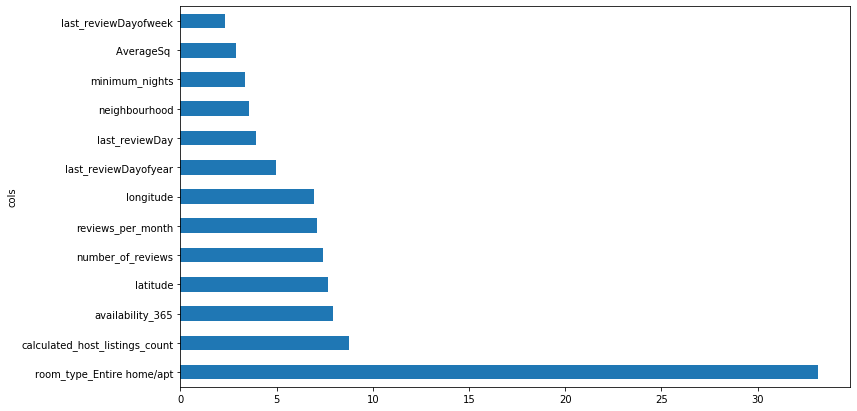

In [273]:
plot_fi(fi[:30]);

In [294]:
valid_xs_imp.columns

Index(['room_type_Entire home/apt', 'number_of_reviews', 'availability_365',
       'calculated_host_listings_count', 'latitude', 'longitude',
       'reviews_per_month', 'last_reviewDay', 'minimum_nights',
       'neighbourhood', 'last_reviewDayofyear', 'last_reviewDayofweek',
       'AverageSq '],
      dtype='object')

In [176]:
import shap

In [282]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(valid_xs_imp)

In [283]:
shap.initjs()

In [299]:
shap.force_plot(explainer.expected_value, shap_values[0,:], valid_xs_imp.iloc[242,:])

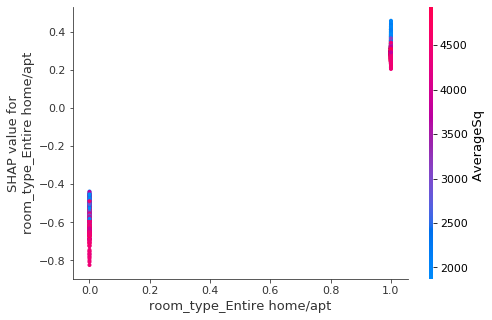

In [296]:
shap.dependence_plot("room_type_Entire home/apt", shap_values, valid_xs_imp)

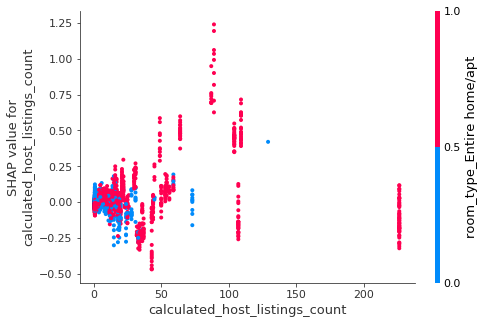

In [297]:
shap.dependence_plot("calculated_host_listings_count", shap_values, valid_xs_imp)

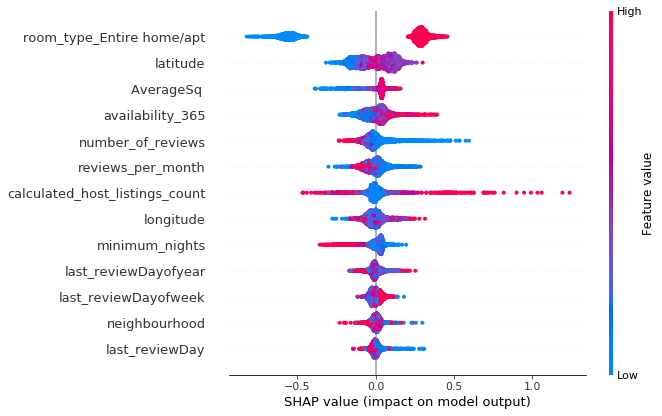

In [286]:
shap.summary_plot(shap_values, valid_xs_imp)